# Exemple Chollet 02

Source : F. Chollet, L’apprentissage profond avec Python. Saint-Cyr-sur-Loire: Machinelearning.fr, 2020. p???

In [28]:
import keras
keras.__version__

'2.14.0'

In [29]:
import os, shutil
from termcolor import colored

## Data

> Attention : utilisation d'un répertoire de données en dehors de l'environnement do notebook !

In [30]:
# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/Users/me/Temp/Data/Dogs-vs-Cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '/Users/me/Temp/Data/cats_and_dogs_small'

# Directories for our training,
# validation and test splits

dir_types = ["train", "validation", "test"]
range_types = [range(1000), range(1000, 1500), range(1500, 2000)]
dir_types_path = {}
labels = ["cat", "dog"]
dir_labels_path = {}

for dir_type, range_type in zip(dir_types, range_types):
    dir_types_path[dir_type] = os.path.join(base_dir, dir_type)
    os.makedirs(dir_types_path[dir_type], exist_ok=True)
    dir_labels_path[dir_type] = {}
    
    for label in labels:
        dir_labels_path[dir_type][label] = os.path.join(dir_types_path[dir_type], f"{label}s")
        os.makedirs(dir_labels_path[dir_type][label], exist_ok=True)
        
        print("Copy {} files of {} for {} in {}".format(
            len(range_type), label, dir_type, dir_labels_path[dir_type][label]
        ))
        for i in range_type:
            fname = f'{label}.{i}.jpg'
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(dir_labels_path[dir_type][label], fname)
            shutil.copyfile(src, dst)

Copy 1000 files of cat for train in /Users/me/Temp/Data/cats_and_dogs_small/train/cats
Copy 1000 files of dog for train in /Users/me/Temp/Data/cats_and_dogs_small/train/dogs
Copy 500 files of cat for validation in /Users/me/Temp/Data/cats_and_dogs_small/validation/cats
Copy 500 files of dog for validation in /Users/me/Temp/Data/cats_and_dogs_small/validation/dogs
Copy 500 files of cat for test in /Users/me/Temp/Data/cats_and_dogs_small/test/cats
Copy 500 files of dog for test in /Users/me/Temp/Data/cats_and_dogs_small/test/dogs


In [31]:
for dir_type in dir_types:
    for label in labels:
        print(f'total {dir_type} {label} images:', colored(len(os.listdir(dir_labels_path[dir_type][label])), "blue"))

total train cat images: 1000
total train dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Model

In [32]:
from keras import layers
from keras import models

In [33]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [35]:
from keras import optimizers

In [36]:
model1.compile(loss='binary_crossentropy',
              optimizer=optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Data preprocessing

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
# All images will be rescaled by 1./255
train_datagen_1 = ImageDataGenerator(rescale=1./255)
test_datagen_1 = ImageDataGenerator(rescale=1./255)

train_generator_1 = train_datagen_1.flow_from_directory(
        # This is the target directory
        dir_types_path["train"],
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator_1 = test_datagen_1.flow_from_directory(
        dir_types_path["validation"],
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
for data_batch, labels_batch in train_generator_1:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [40]:
history1 = model1.fit(
      train_generator_1,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator_1,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6928 - acc: 0.5390 - val_loss: 0.6745 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 15s 153ms/step - loss: 0.6575 - acc: 0.6155 - val_loss: 0.6335 - val_acc: 0.6510
Epoch 3/30
100/100 [==============================] - 15s 153ms/step - loss: 0.6119 - acc: 0.6625 - val_loss: 0.6235 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 16s 156ms/step - loss: 0.5725 - acc: 0.6920 - val_loss: 0.5987 - val_acc: 0.6790
Epoch 5/30
100/100 [==============================] - 15s 154ms/step - loss: 0.5402 - acc: 0.7230 - val_loss: 0.6629 - val_acc: 0.6260
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 0.5127 - acc: 0.7425 - val_loss: 0.5869 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 16s 156ms/step - loss: 0.4842 - acc: 0.7640 - val_loss: 0.5927 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 1

In [41]:
model.save('cats_and_dogs_small_1.keras')

In [42]:
import matplotlib.pyplot as plt

In [43]:
def display_perfs(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'b--', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'b--', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

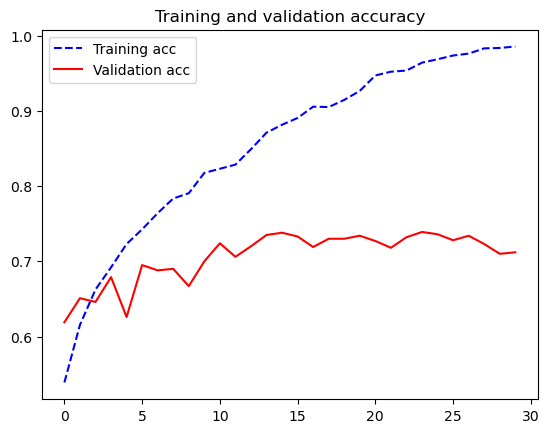

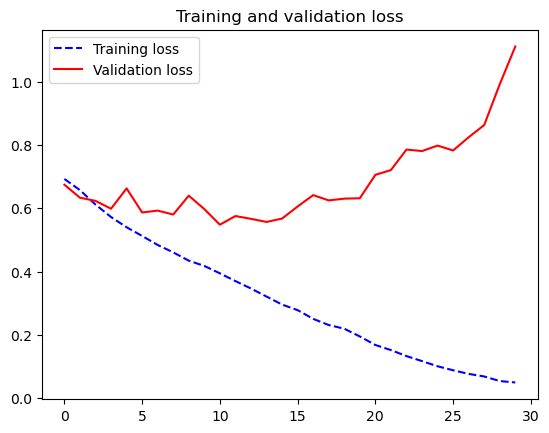

In [44]:
display_perfs(history1)

## Data augmentation

In [45]:
image_data_generator = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

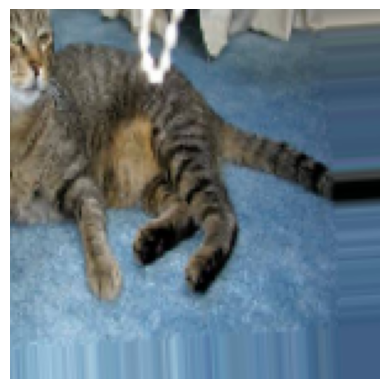

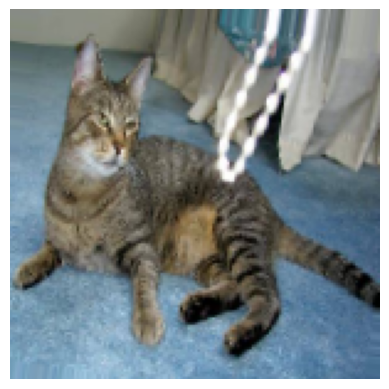

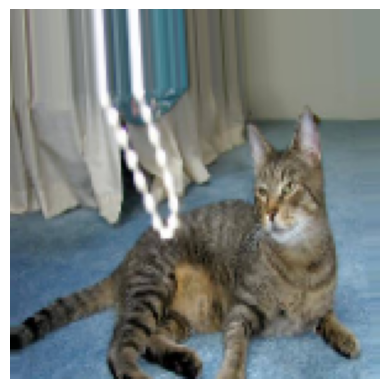

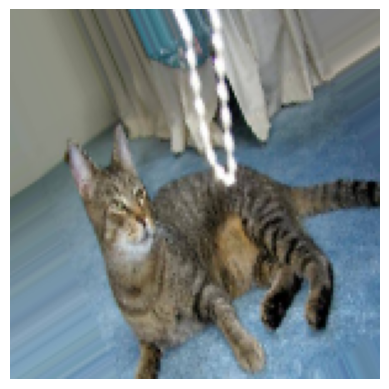

In [46]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

train_cats_dir = dir_labels_path["train"]["cat"]
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in image_data_generator.flow(x, batch_size=1):
    plt.figure(i)
    plt.axis("off")
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [47]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.legacy.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [48]:
train_datagen_2 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen_2 = ImageDataGenerator(rescale=1./255)

train_generator_2 = train_datagen_2.flow_from_directory(
        # This is the target directory
        dir_types_path["train"],
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator_2 = test_datagen_2.flow_from_directory(
        dir_types_path["validation"],
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
history2 = model2.fit(
      train_generator_2,
      epochs=100,
      validation_data=validation_generator_2
)

Epoch 1/100
63/63 [==============================] - 17s 270ms/step - loss: 0.5546 - acc: 0.7055 - val_loss: 0.5295 - val_acc: 0.7240
Epoch 2/100
63/63 [==============================] - 17s 269ms/step - loss: 0.5609 - acc: 0.7050 - val_loss: 0.5542 - val_acc: 0.7060
Epoch 3/100
63/63 [==============================] - 17s 275ms/step - loss: 0.5448 - acc: 0.7215 - val_loss: 0.5012 - val_acc: 0.7520
Epoch 4/100
63/63 [==============================] - 17s 274ms/step - loss: 0.5455 - acc: 0.7250 - val_loss: 0.5922 - val_acc: 0.6670
Epoch 5/100
63/63 [==============================] - 18s 280ms/step - loss: 0.5424 - acc: 0.7195 - val_loss: 0.5827 - val_acc: 0.7030
Epoch 6/100
63/63 [==============================] - 18s 277ms/step - loss: 0.5505 - acc: 0.7190 - val_loss: 0.4952 - val_acc: 0.7450
Epoch 7/100
63/63 [==============================] - 18s 283ms/step - loss: 0.5362 - acc: 0.7335 - val_loss: 0.4987 - val_acc: 0.7540
Epoch 8/100
63/63 [==============================] - 18s 285ms

In [54]:
model.save('cats_and_dogs_small_2.keras')

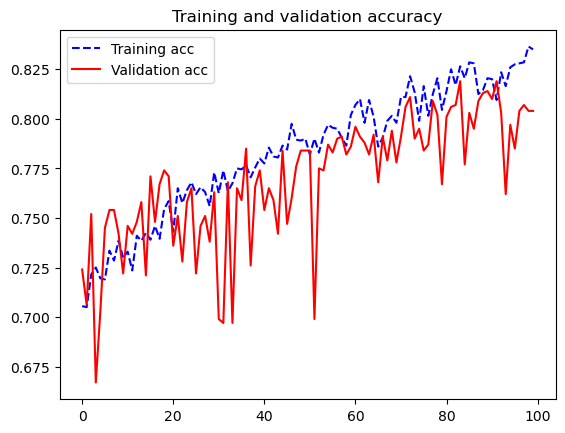

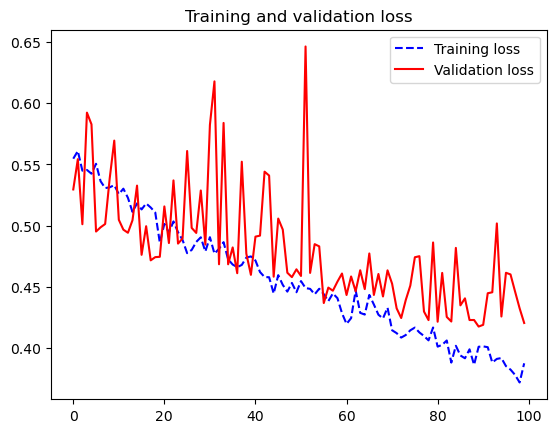

In [55]:
display_perfs(history2)